**1. Data Loading and Initial Inspection**

In [170]:
import pandas as pd

# Load the dataset
df = pd.read_csv("retail_enriched_dataset.csv", parse_dates=["Order Date", "Ship Date"])

# --- 1.1 Basic Info ---
print("✅ Dataset Shape:", df.shape)
print("\n✅ Data Types & Memory Usage:")
print(df.info())

# --- 1.2 Missing Values ---
print("\n🔍 Missing Values (per column):")
print(df.isnull().sum())

# --- 1.3 Unique Value Counts for Key Columns ---
key_columns = ["City", "Category", "Sub-Category", "Segment", "Region", "holiday_name", "location"]
print("\n📊 Unique Value Counts:")
for col in key_columns:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

# Optional: Look at first few rows
print("\n🧾 Sample Rows:")
print(df.head(3))


✅ Dataset Shape: (1794015, 27)

✅ Data Types & Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794015 entries, 0 to 1794014
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Order Date          datetime64[ns]
 1   Ship Date           datetime64[ns]
 2   Ship Mode           object        
 3   Customer Name       object        
 4   Segment             object        
 5   Country             object        
 6   City                object        
 7   State               object        
 8   Postal Code         int64         
 9   Region              object        
 10  Category            object        
 11  Sub-Category        object        
 12  Product Name        object        
 13  Sales               float64       
 14  Order_Year          int64         
 15  Order_Month         int64         
 16  holiday_name        object        
 17  holiday_type        object        
 18  year                i

## 2. Import Libraries for Analysis

In [172]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set global aesthetics
sns.set(style="whitegrid")


## 3. Data Cleaning and Preprocessing

In [174]:
# Create a copy for clean processing
df_final = df.copy()

# 1. Convert 'Order_Week' to datetime
df_final["Order_Week"] = pd.to_datetime(df_final["Order_Week"])

# 2. Fill missing 'Deaths_per_million' with 0 (optional)
df_final["Deaths_per_million"] = df_final["Deaths_per_million"].fillna(0)

# 3. Drop duplicates
print("🔁 Duplicate rows:", df_final.duplicated().sum())
df_final = df_final.drop_duplicates()

# 4. Check for zero or negative sales
print("💸 Zero or Negative Sales:", (df_final["Sales"] <= 0).sum())


# 5. Sort by Order Date
df_final = df_final.sort_values("Order Date").reset_index(drop=True)

# ✅ Final check
print("✅ Final dataset shape:", df_final.shape)
print("🕒 Date Range:", df_final["Order Date"].min(), "→", df_final["Order Date"].max())


🔁 Duplicate rows: 0
💸 Zero or Negative Sales: 0
✅ Final dataset shape: (1794015, 27)
🕒 Date Range: 2015-01-03 00:00:00 → 2018-12-30 00:00:00


## 4. Sales Analysis by Segment, Category, and Sub-Category

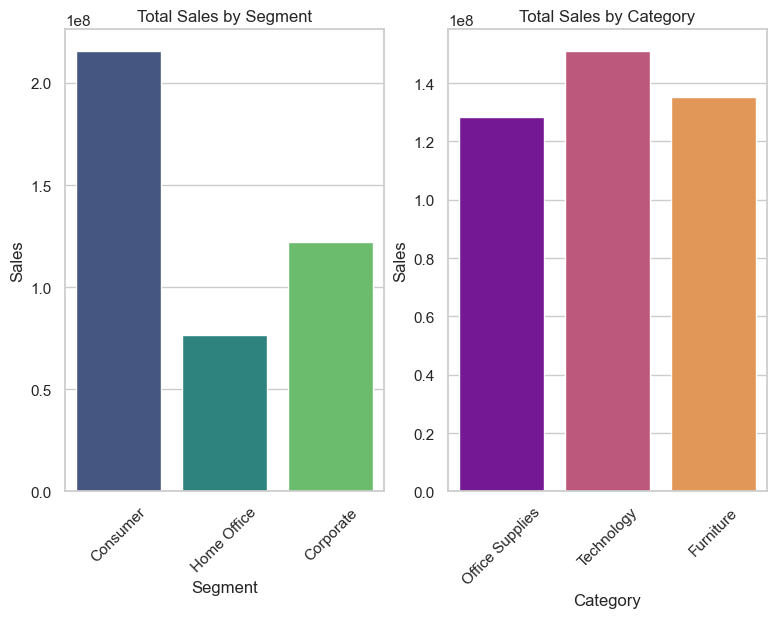

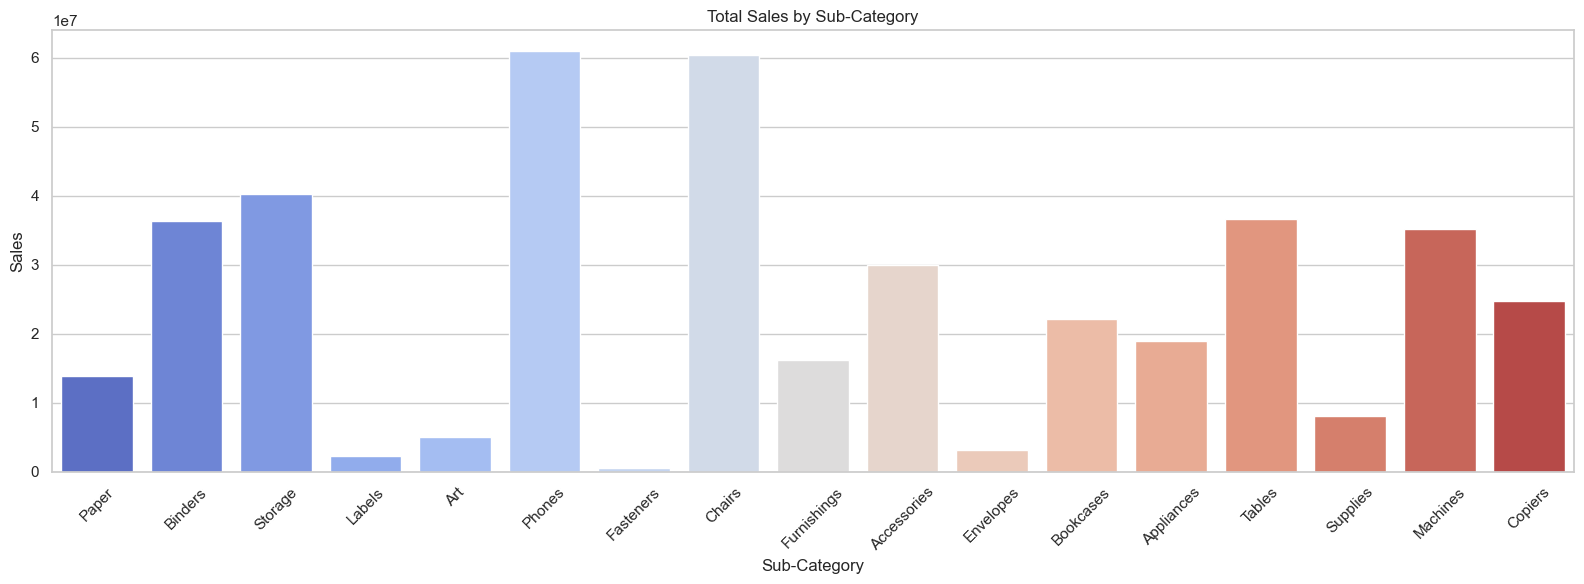

In [176]:

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Sales by Segment
plt.subplot(1, 3, 1)
sns.barplot(data=df_final, x='Segment', y='Sales', estimator='sum', errorbar=None, hue='Segment', palette='viridis', legend=False)
plt.title('Total Sales by Segment')
plt.xticks(rotation=45)

# Sales by Category
plt.subplot(1, 3, 2)
sns.barplot(data=df_final, x='Category', y='Sales', estimator='sum', errorbar=None, hue='Category', palette='plasma', legend=False)
plt.title('Total Sales by Category')
plt.xticks(rotation=45)

# Sales by Sub-Category
plt.figure(figsize=(16, 6))
sns.barplot(data=df_final, x='Sub-Category', y='Sales', estimator='sum', errorbar=None, hue='Sub-Category', palette='coolwarm', legend=False)
plt.title('Total Sales by Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## 5. Order Analysis by Region and City

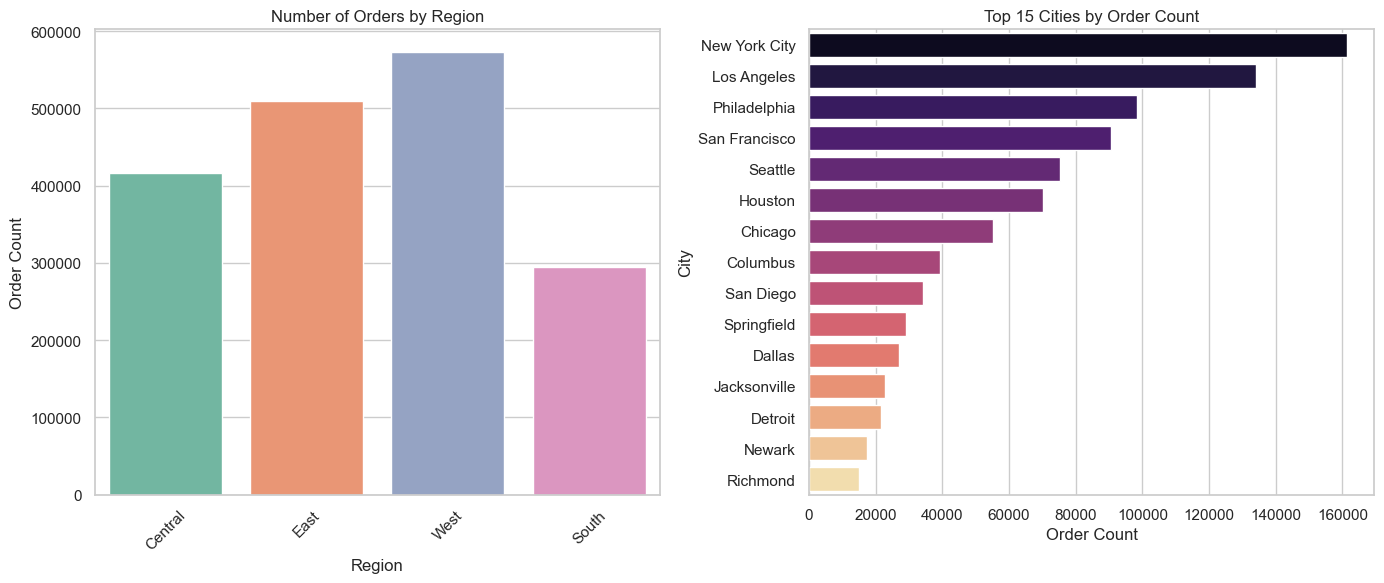

In [178]:

# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Count of orders per region
plt.subplot(1, 2, 1)
sns.countplot(data=df_final, x='Region', hue='Region', palette='Set2', legend=False)
plt.title("Number of Orders by Region")
plt.xlabel("Region")
plt.ylabel("Order Count")
plt.xticks(rotation=45)

# Top 15 cities by number of orders
top_cities = df['City'].value_counts().nlargest(15)
plt.subplot(1, 2, 2)
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette='magma', legend=False)
plt.title("Top 15 Cities by Order Count")
plt.xlabel("Order Count")
plt.ylabel("City")

plt.tight_layout()
plt.show()


## 6. Basic Stats and Monthly Sales Analysis

🧾 Total Orders: 1794015
👥 Unique Customers: 793
💰 Total Sales: $ 414394316.63


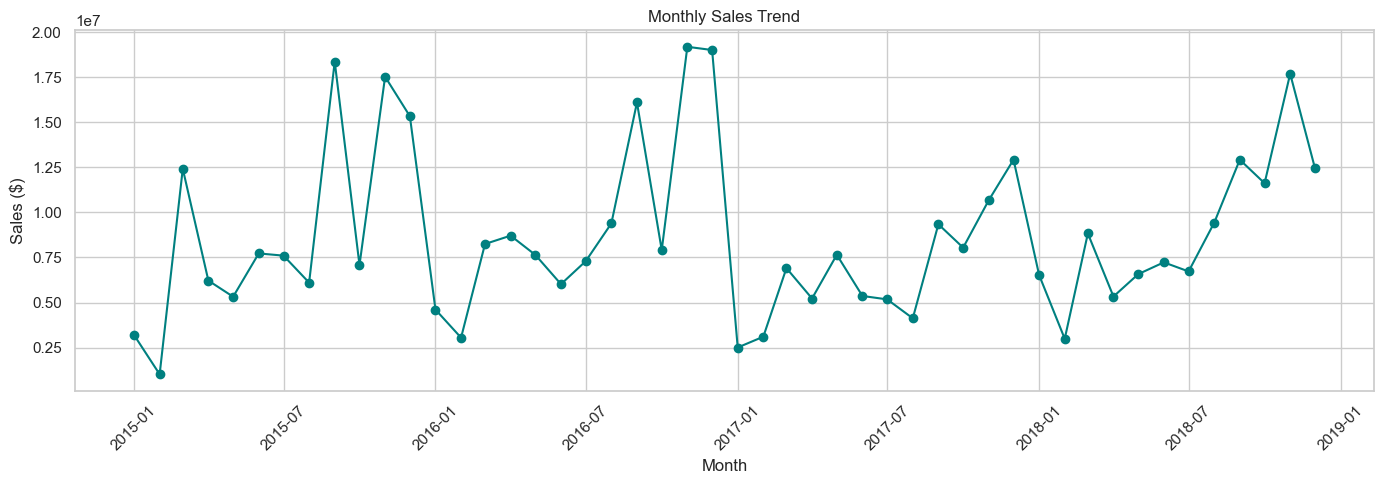

In [180]:

# Basic stats
print("🧾 Total Orders:", len(df_final))
print("👥 Unique Customers:", df_final["Customer Name"].nunique())
print("💰 Total Sales: $", round(df_final["Sales"].sum(), 2))

# Plot settings
sns.set(style="whitegrid")
plt.figure(figsize=(14, 5))

# Monthly Sales
monthly_sales = df_final.resample('MS', on='Order Date')["Sales"].sum()

plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 7. Descriptive Statistics

In [182]:
print(df_final[["Sales", "CPI", "Gasoline_Price"]].describe().T)


                    count        mean         std      min      25%      50%  \
Sales           1794015.0  230.987097  620.942603    0.444   17.140   54.900   
CPI             1794015.0  243.700400    5.613954  233.707  238.638  241.432   
Gasoline_Price  1794015.0    2.431894    0.271035    1.724    2.228    2.388   

                    75%        max  
Sales           211.840  22638.480  
CPI             249.554    252.885  
Gasoline_Price    2.664      2.962  


# 8. Statistical summary of selected numerical features

In [184]:
# Statistical summary of selected numerical features
df_final[numerical_features].describe().T


,count,mean,std,min,25%,50%,75%,max
Sales,1794015.0,230.987097,620.942603,0.444,17.140,54.900,211.840,22638.480
CPI,1794015.0,243.700400,5.613954,233.707,238.638,241.432,249.554,252.885
Gasoline_Price,1794015.0,2.431894,0.271035,1.724,2.228,2.388,2.664,2.962


In [185]:
# Drop unnecessary column
df.drop(columns=["Deaths_per_million"], inplace=True)

# Confirm drop
print("Deaths_per_million dropped:", "Deaths_per_million" not in df.columns)

Deaths_per_million dropped: True


In [186]:
# Overview of the dataset
print("Shape of dataset:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique values per column:\n", df.nunique())


Shape of dataset: (1794015, 26)

Column Types:
 Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer Name             object
Segment                   object
Country                   object
City                      object
State                     object
Postal Code                int64
Region                    object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Order_Year                 int64
Order_Month                int64
holiday_name              object
holiday_type              object
year                       int64
location                  object
category                  object
rank                       int64
query                     object
CPI                      float64
Order_Week                object
Gasoline_Price           float64
dtype: object

Missing Values:
 Order Date        0
Ship Date         0
Ship Mode         0
Cu

## 9. Sales Distribution by Category and Subcategory

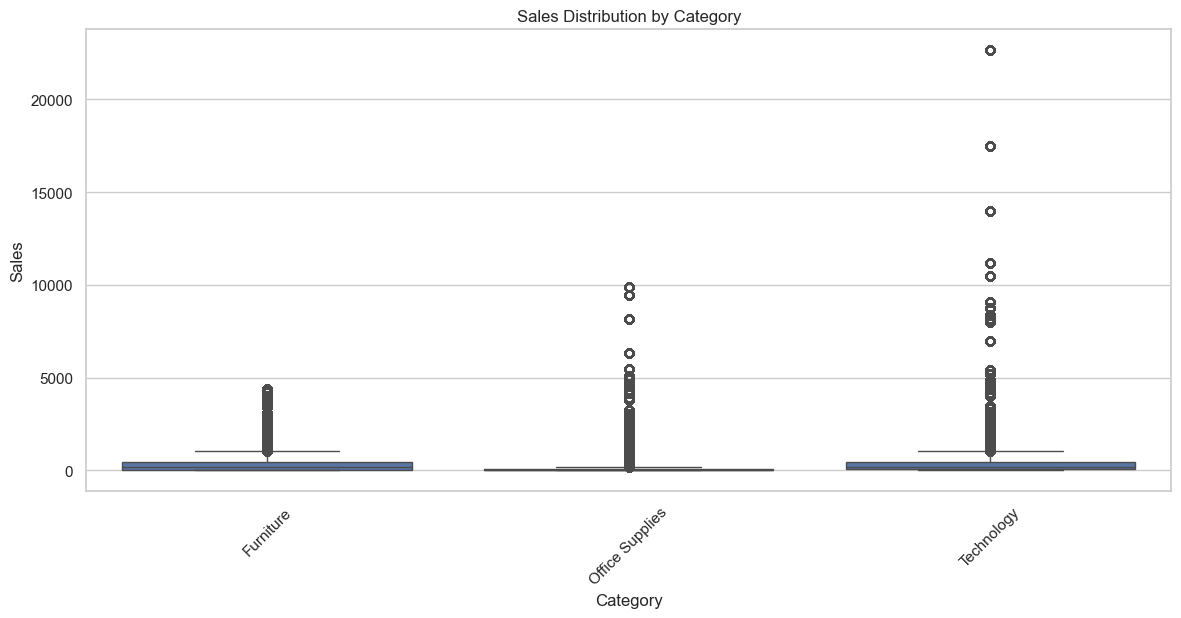

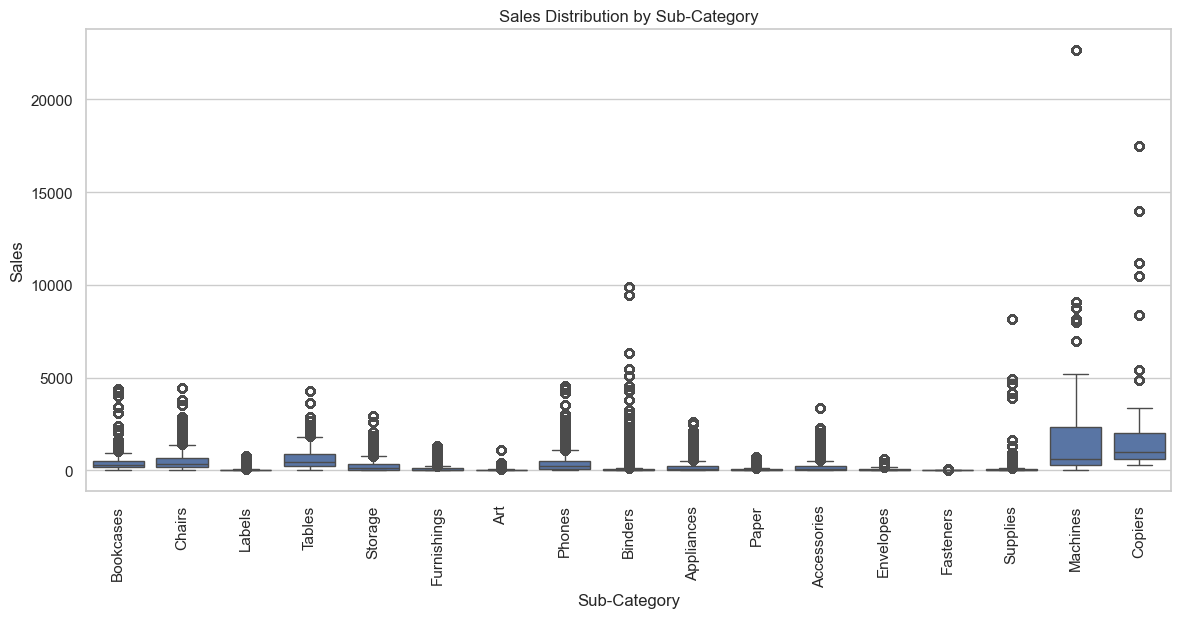

In [188]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Category', y='Sales')
plt.title("Sales Distribution by Category")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Sub-Category', y='Sales')
plt.title("Sales Distribution by Sub-Category")
plt.xticks(rotation=90)
plt.show()


## 10. Sales Analysis by Category/Segment

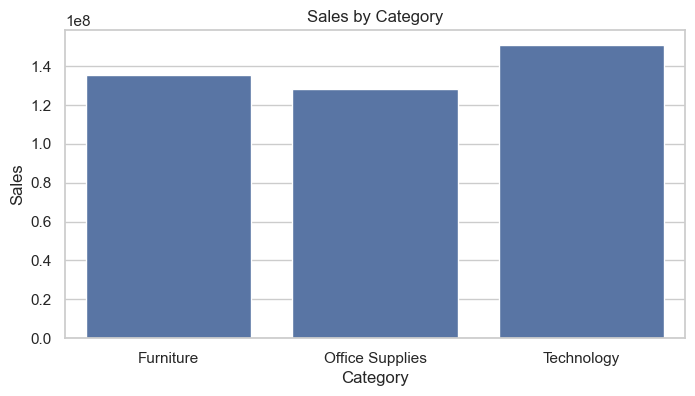

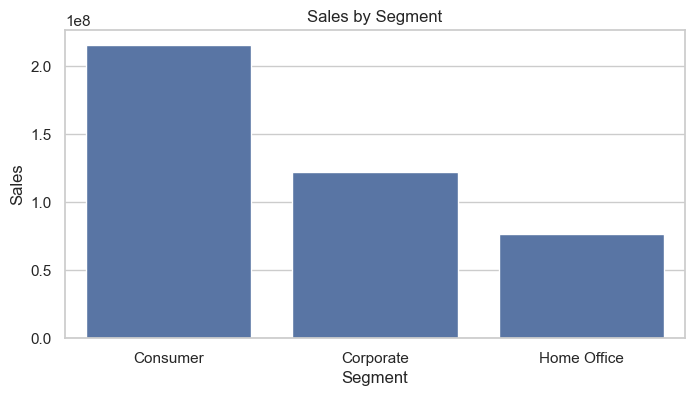

In [190]:


# Sales by Category
plt.figure(figsize=(8, 4))
sns.barplot(data=df.groupby("Category")["Sales"].sum().reset_index(), x="Category", y="Sales")
plt.title("Sales by Category")
plt.show()

# Segment vs Sales
plt.figure(figsize=(8, 4))
sns.barplot(data=df.groupby("Segment")["Sales"].sum().reset_index(), x="Segment", y="Sales")
plt.title("Sales by Segment")
plt.show()


## 11. Sales, CPI, Gasoline Price Distributions, and Segment Counts

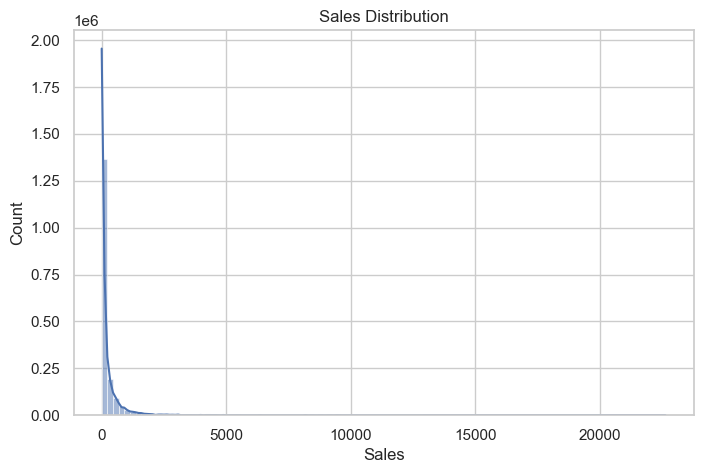

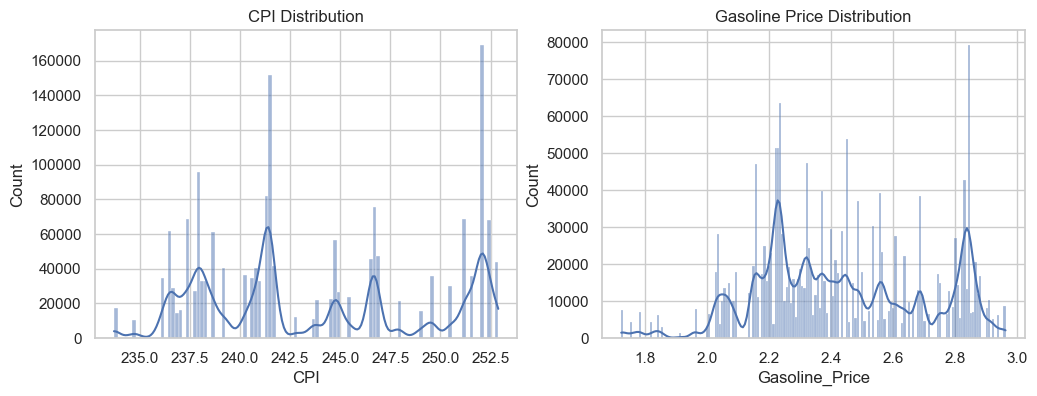

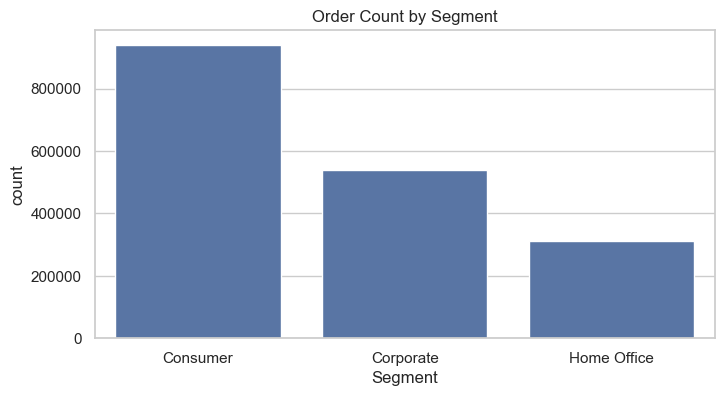

In [192]:
# Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=100, kde=True)
plt.title("Sales Distribution")
plt.show()

# CPI & Gasoline Price Distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['CPI'], kde=True, ax=ax[0])
ax[0].set_title("CPI Distribution")
sns.histplot(df['Gasoline_Price'], kde=True, ax=ax[1])
ax[1].set_title("Gasoline Price Distribution")
plt.show()

# Count plot for Segment
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Segment')
plt.title("Order Count by Segment")
plt.show()

### 12. Sales by Country, State, City

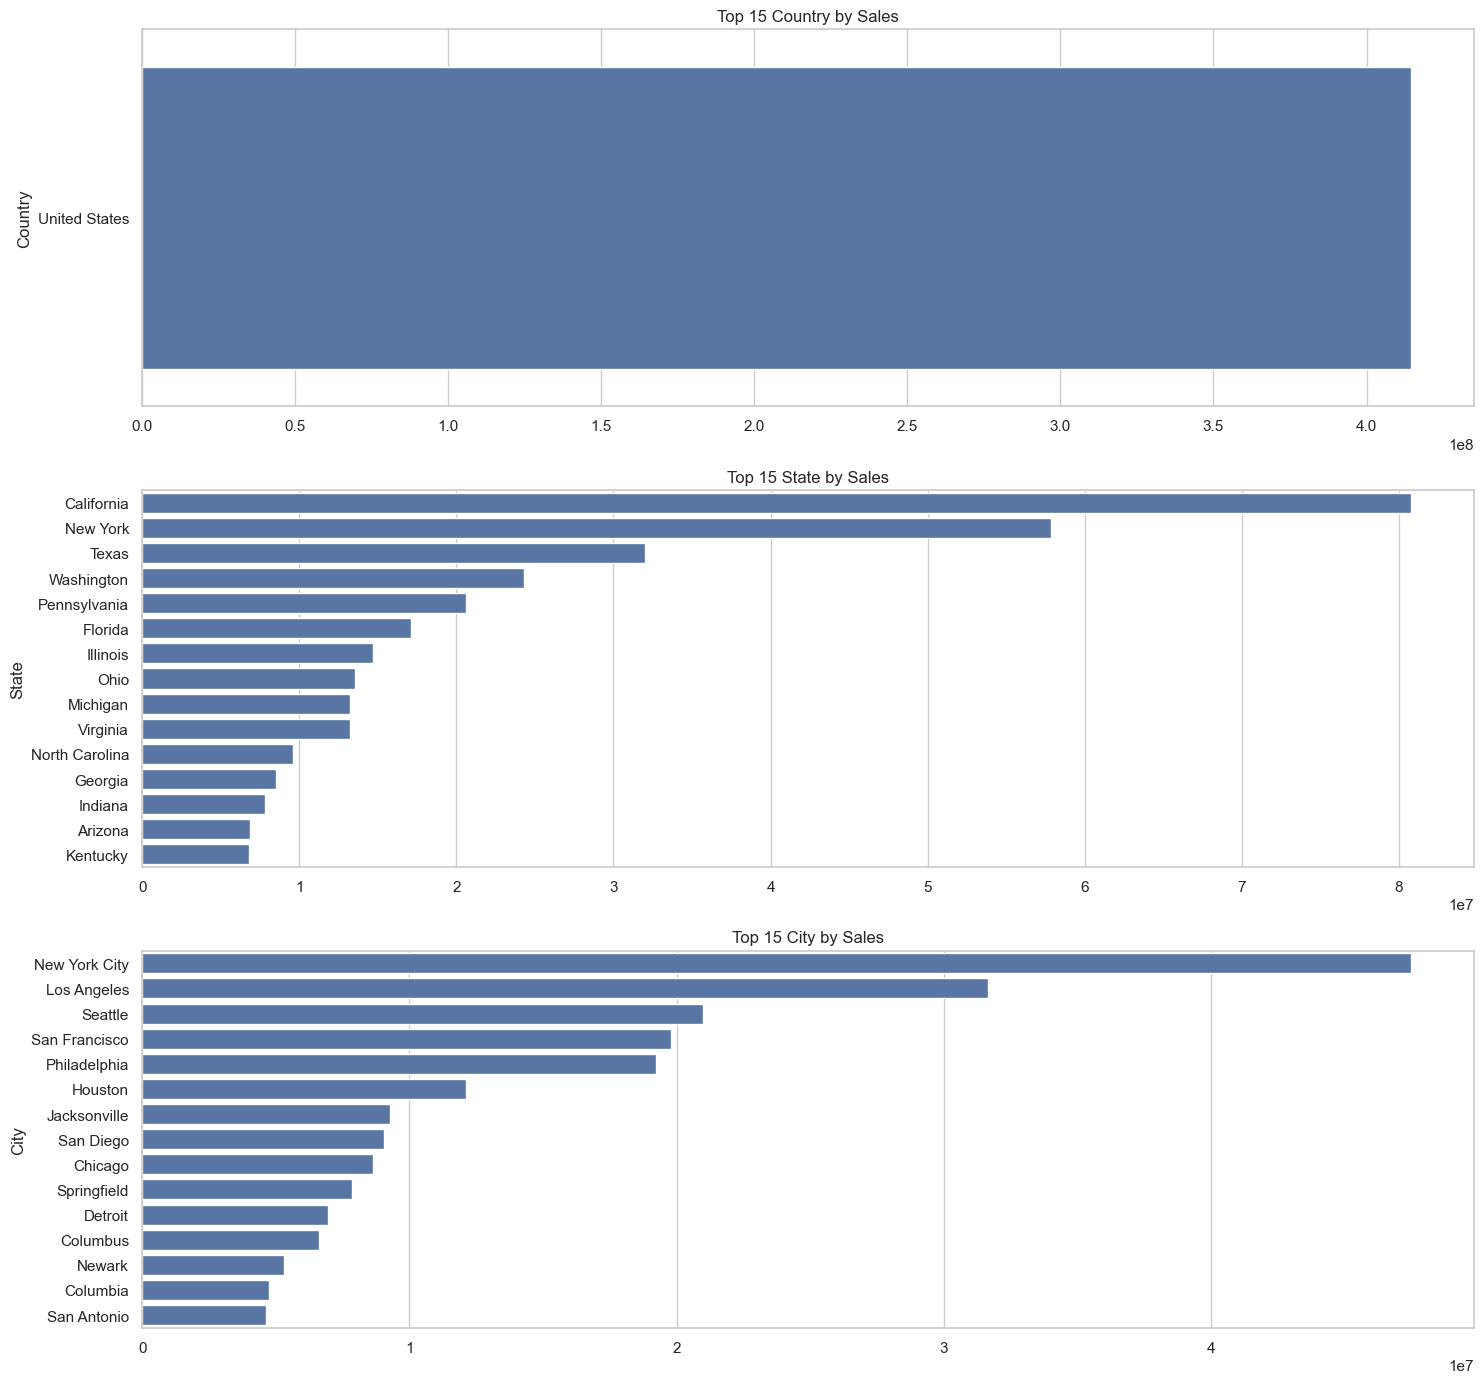

In [194]:

geo_cols = ['Country', 'State', 'City']
fig, axs = plt.subplots(3, 1, figsize=(15, 14))
for i, col in enumerate(geo_cols):
    top_vals = df.groupby(col)['Sales'].sum().sort_values(ascending=False).head(15)
    sns.barplot(x=top_vals.values, y=top_vals.index, ax=axs[i])
    axs[i].set_title(f'Top 15 {col} by Sales')
plt.tight_layout()
plt.show()


### 13. Sales by Category, Sub-Category, Segment, Region, Ship Mode

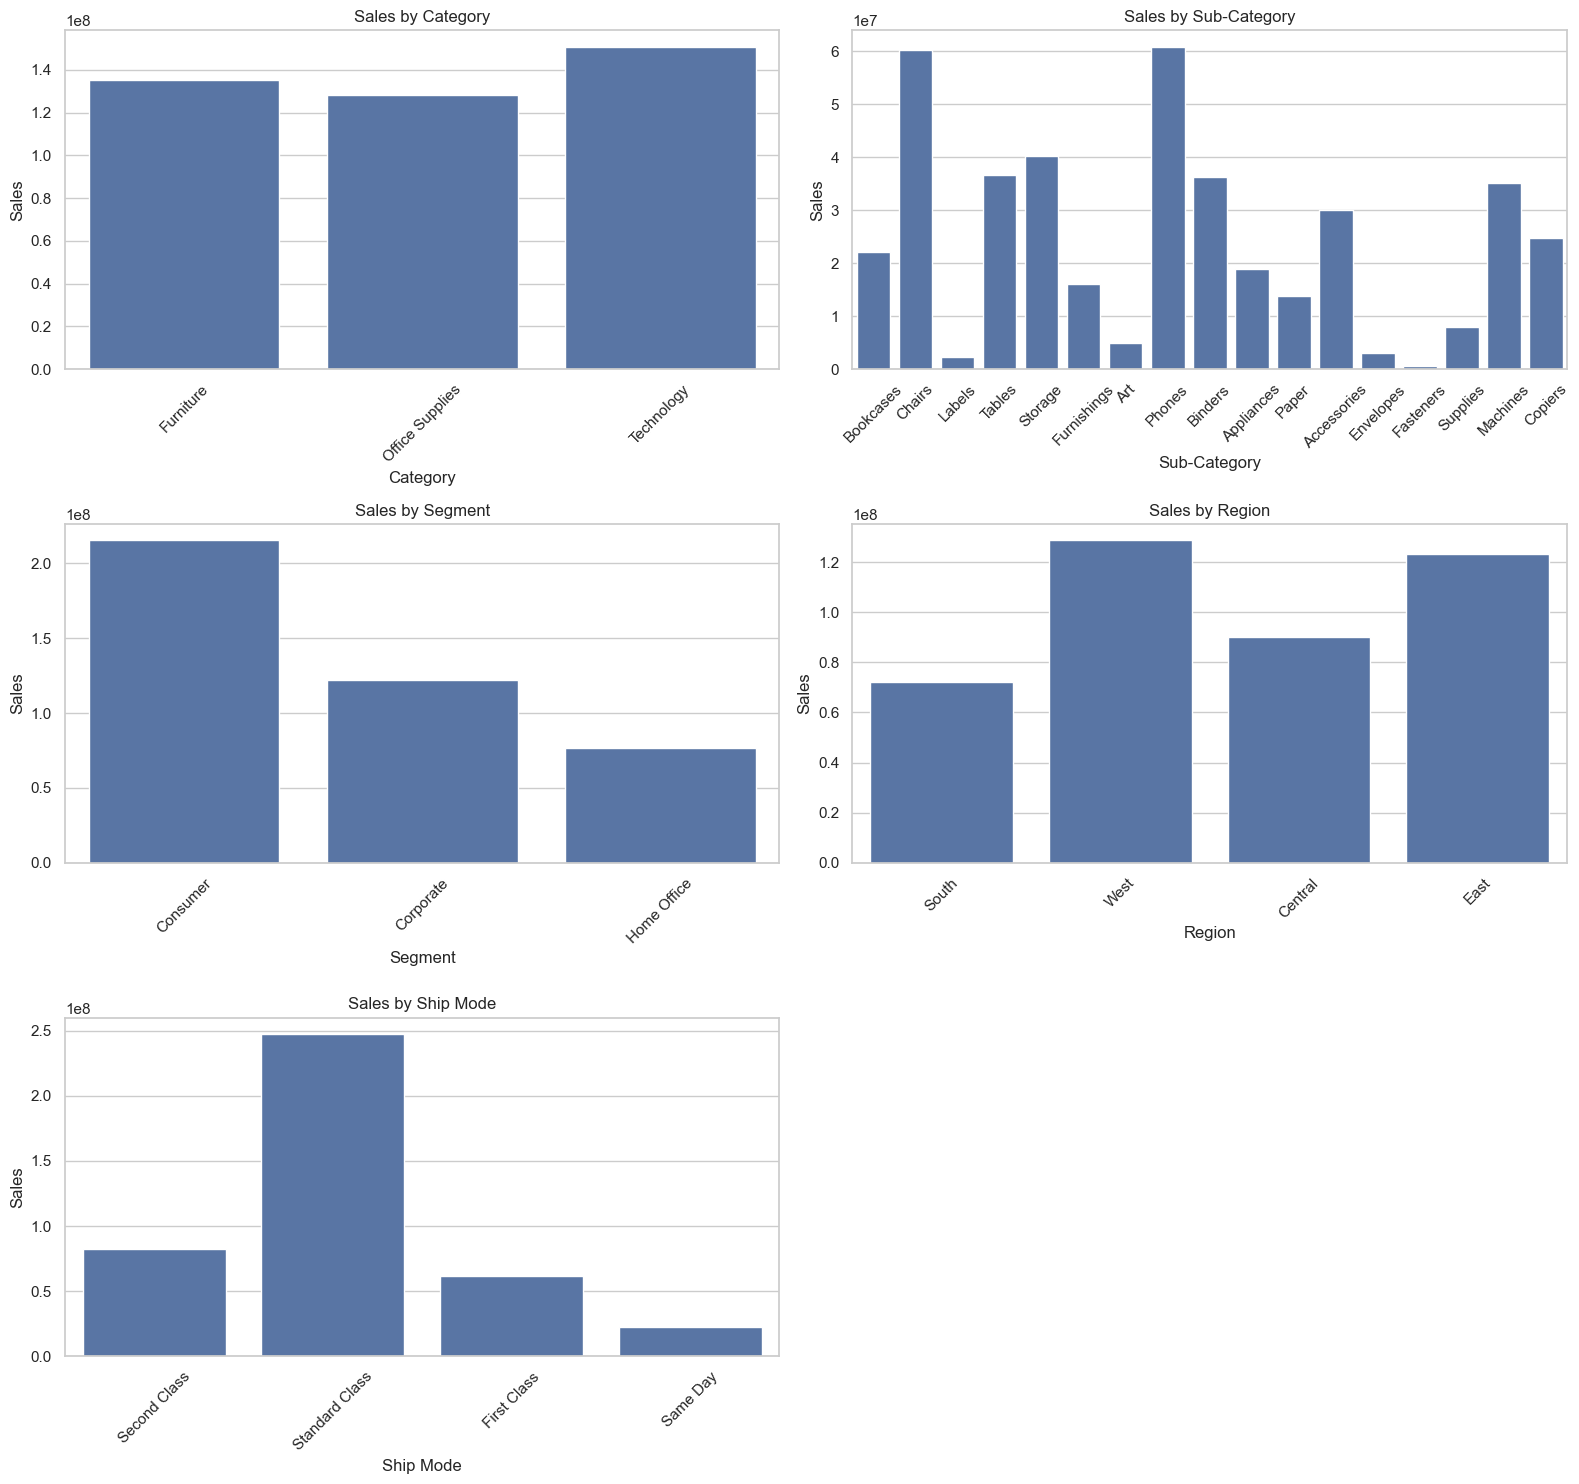

In [196]:

cat_cols = ['Category', 'Sub-Category', 'Segment', 'Region', 'Ship Mode']
fig, axs = plt.subplots(3, 2, figsize=(16, 15))
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    sns.barplot(x=col, y='Sales', data=df, estimator=sum, errorbar=None, ax=axs[i])
    axs[i].set_title(f'Sales by {col}')
    axs[i].tick_params(axis='x', rotation=45)

axs[-1].axis('off')  # Turn off the extra subplot
plt.tight_layout()
plt.show()

## 14. Top Customer/Product Analysis and Segment Preferences

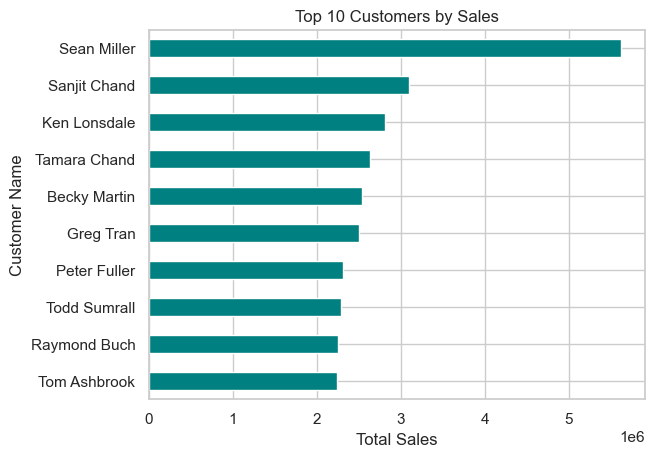

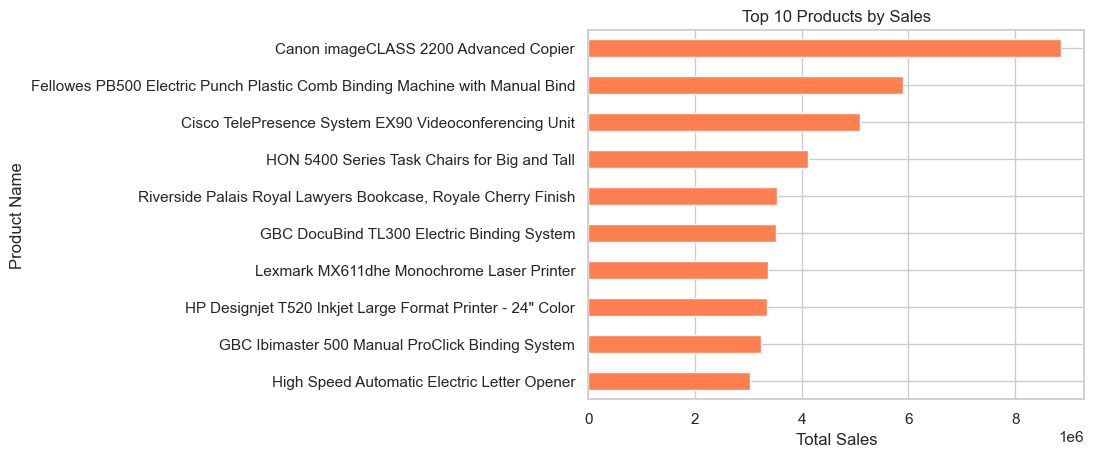

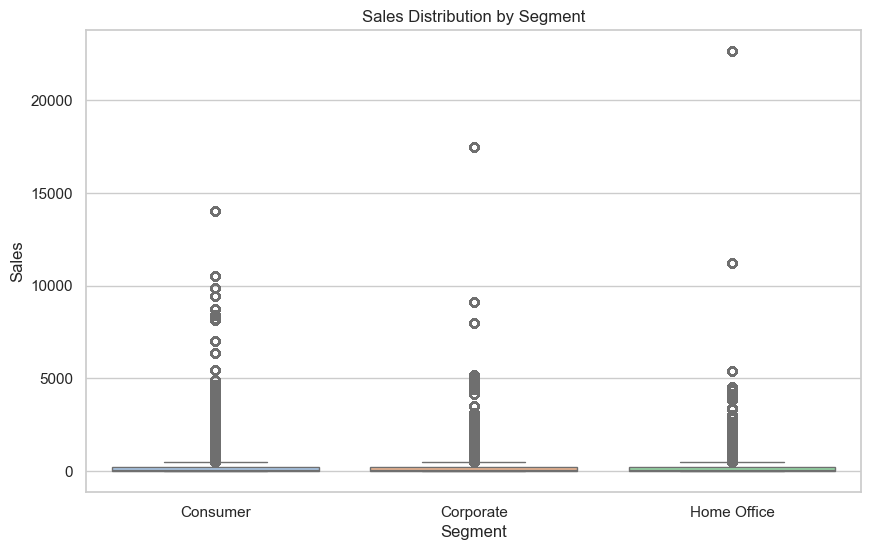

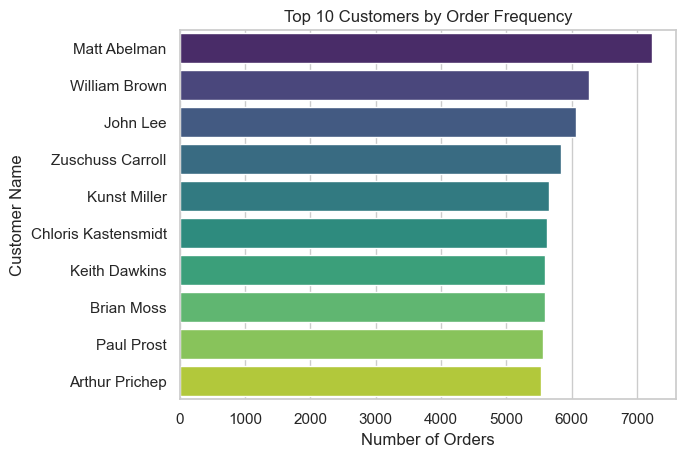

In [198]:
# Top 10 Customers by Sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='barh', color='teal')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name') # Added y-label
plt.gca().invert_yaxis()
plt.show()

# Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', color='coral')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Name') # Added y-label
plt.gca().invert_yaxis()
plt.show()

# Product Preferences by Segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Segment', y='Sales', palette='pastel', hue='Segment', legend=False)
plt.title('Sales Distribution by Segment')
plt.xlabel('Segment') # Added x-label
plt.ylabel('Sales') # Added y-label
plt.show()

# Order Frequency per Customer
customer_orders = df['Customer Name'].value_counts().head(10)
sns.barplot(x=customer_orders.values, y=customer_orders.index, palette='viridis', hue=customer_orders.index, legend=False)
plt.title('Top 10 Customers by Order Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Customer Name') # Added y-label
plt.show()


## 15. Holiday vs Non-Holiday Sales Comparison

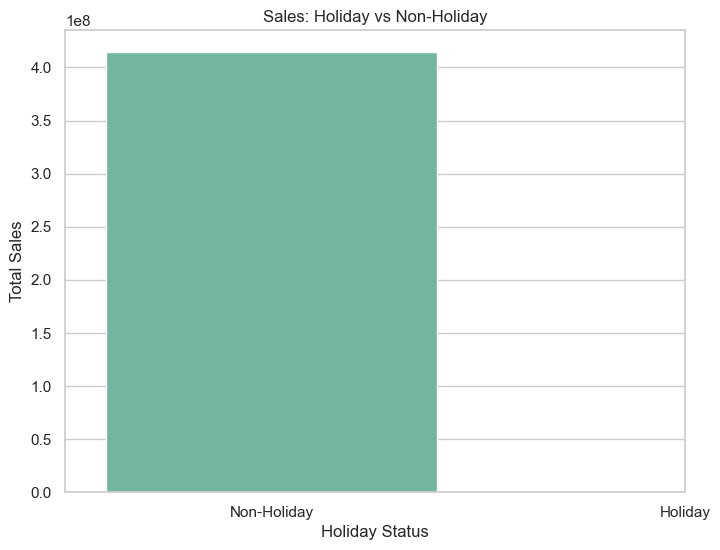

In [200]:
# Create holiday flag
df['Is_Holiday'] = df['holiday_name'].notna()

# Compare sales on holidays vs non-holidays
holiday_sales = df.groupby('Is_Holiday')['Sales'].sum()

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='Set2', hue=holiday_sales.index, legend=False)
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.title('Sales: Holiday vs Non-Holiday')
plt.ylabel('Total Sales')
plt.xlabel('Holiday Status')  # Add x-axis label for clarity
plt.show()

## 16. Sales vs CPI and Gasoline Price

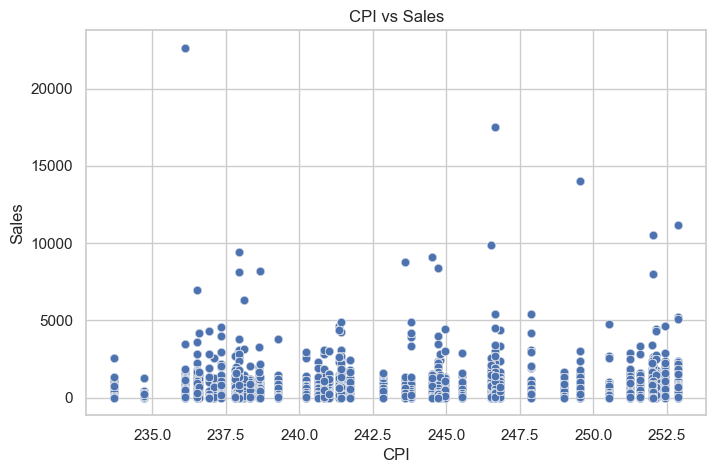

Correlation (CPI vs Sales): -0.01


In [202]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='CPI', y='Sales', alpha=0.3)
plt.title('CPI vs Sales')
plt.show()

# Correlation between CPI and Sales
print(f"Correlation (CPI vs Sales): {df['CPI'].corr(df['Sales']):.2f}")


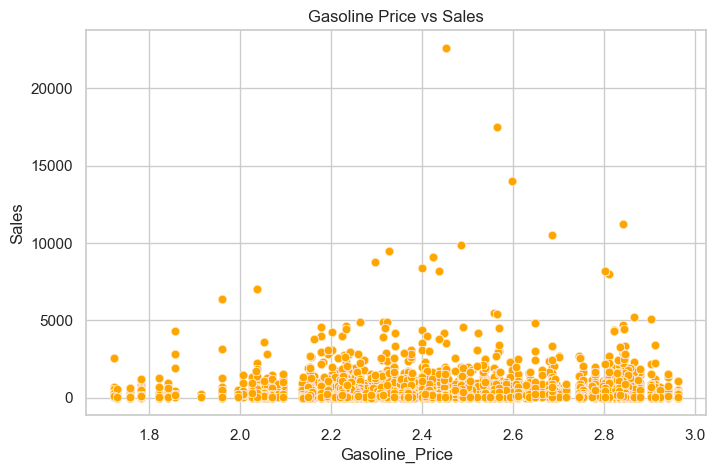

Correlation (Gasoline Price vs Sales): -0.00


In [203]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Gasoline_Price', y='Sales', alpha=0.3, color='orange')
plt.title('Gasoline Price vs Sales')
plt.show()

# Correlation between Gasoline Price and Sales
print(f"Correlation (Gasoline Price vs Sales): {df['Gasoline_Price'].corr(df['Sales']):.2f}")


## 17. Average Sales by Query

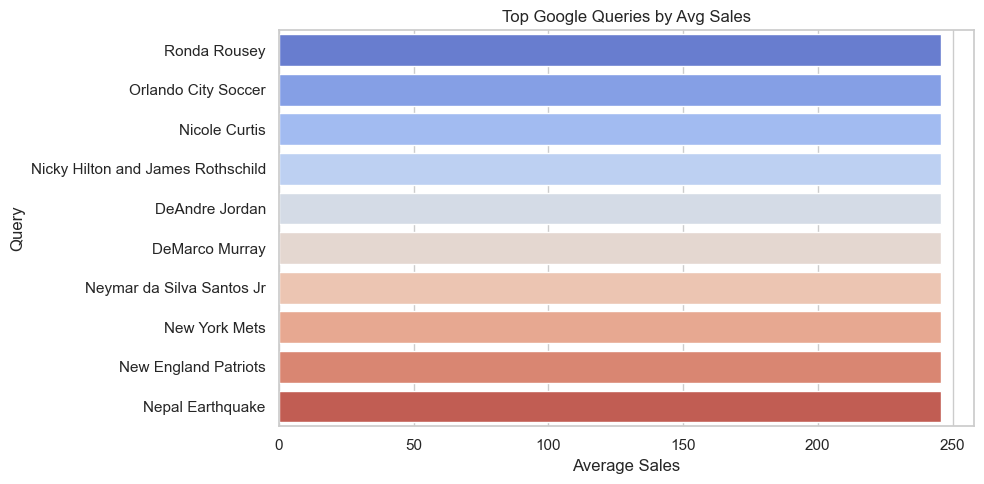

In [205]:
# Average sales by query
query_sales = df.groupby('query')['Sales'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(y=query_sales.index, x=query_sales.values, palette='coolwarm', hue=query_sales.index, legend=False)
plt.title('Top Google Queries by Avg Sales')
plt.xlabel('Average Sales')
plt.ylabel('Query')  # Add y-axis label for clarity
plt.tight_layout()
plt.show()



## 18. Weekly Sales Trend

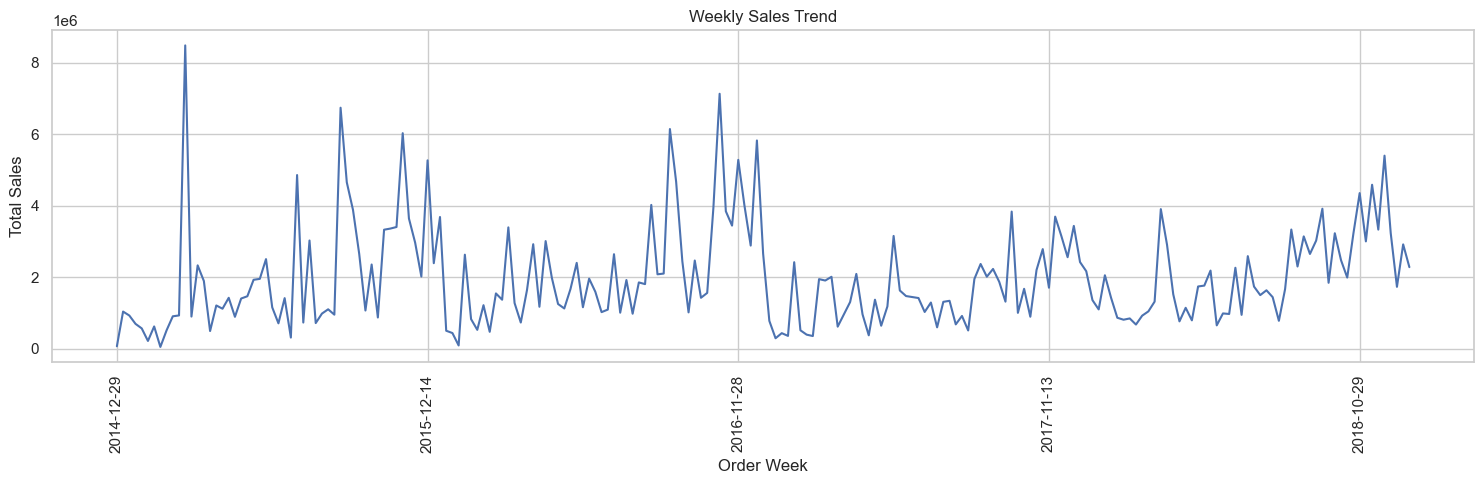

In [207]:
weekly_sales = df.groupby('Order_Week')['Sales'].sum().sort_index()

plt.figure(figsize=(15, 5))
weekly_sales.plot()
plt.title('Weekly Sales Trend')
plt.xlabel('Order Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## 19. Monthly Sales with Rolling Average

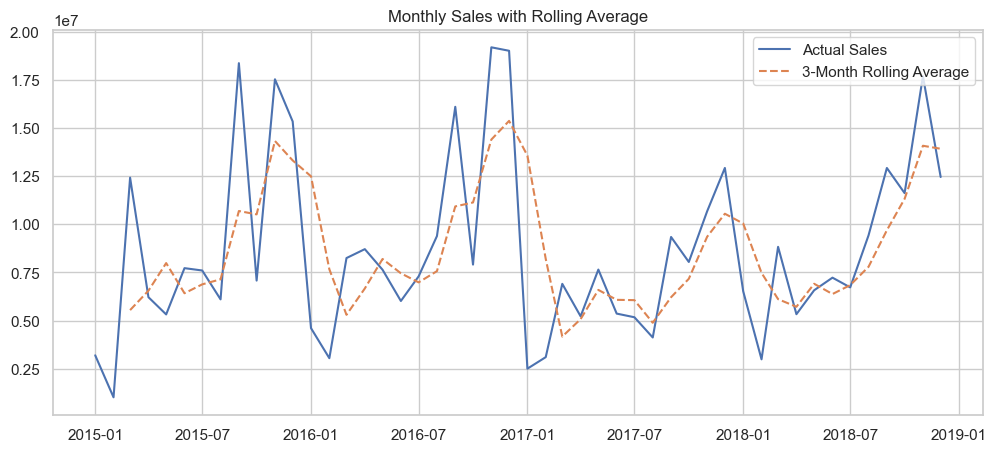

In [214]:
monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Sales'].sum().reset_index()
if not isinstance(monthly_sales, pd.DataFrame):
    monthly_sales = monthly_sales.to_frame() # Convert to DataFrame if it's a Series

monthly_sales['Year-Month'] = pd.to_datetime(monthly_sales['Order_Year'].astype(str) + '-' + monthly_sales['Order_Month'].astype(str))
monthly_sales = monthly_sales.set_index('Year-Month') # Now it should work
monthly_sales['Rolling_Sales'] = monthly_sales['Sales'].rolling(window=3).mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_sales['Sales'], label='Actual Sales')
plt.plot(monthly_sales['Rolling_Sales'], label='3-Month Rolling Average', linestyle='--')
plt.title('Monthly Sales with Rolling Average')
plt.legend()
plt.show()


## 20. Seasonal Decomposition of Sales

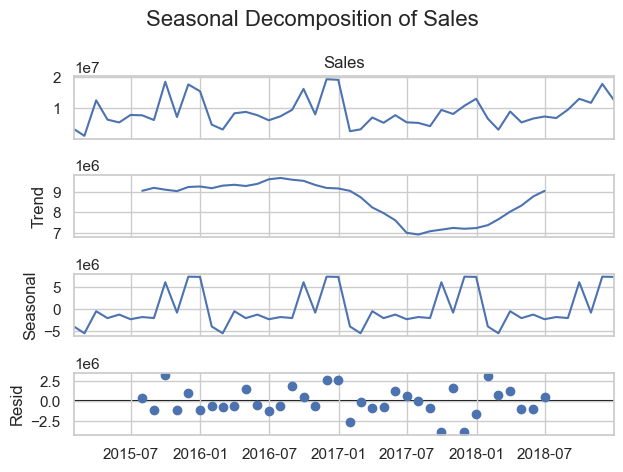

In [216]:
from statsmodels.tsa.seasonal import seasonal_decompose

monthly_sales_decomp = df.groupby('Order Date')['Sales'].sum().resample('ME').sum()
result = seasonal_decompose(monthly_sales_decomp, model='additive')

result.plot()
plt.suptitle('Seasonal Decomposition of Sales', fontsize=16)
plt.tight_layout()
plt.show()


## 21. Correlation Matrix

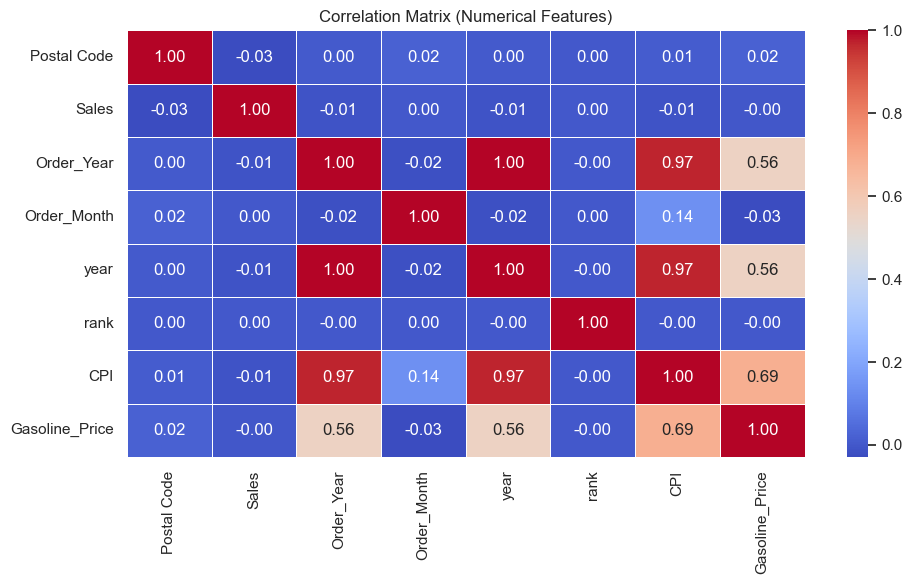

In [218]:
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(numeric_cols, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features)')
plt.tight_layout()
plt.show()


## 22. Sales Distribution by Category

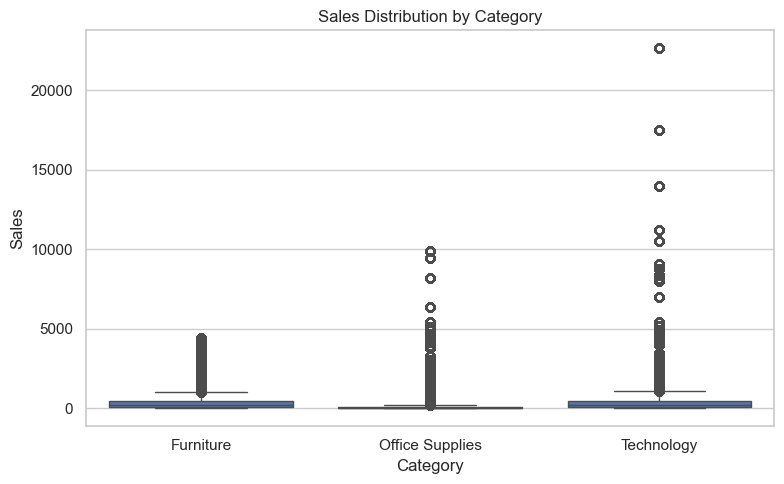

In [220]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.tight_layout()
plt.show()


## 23. Monthly Sales Heatmap by City

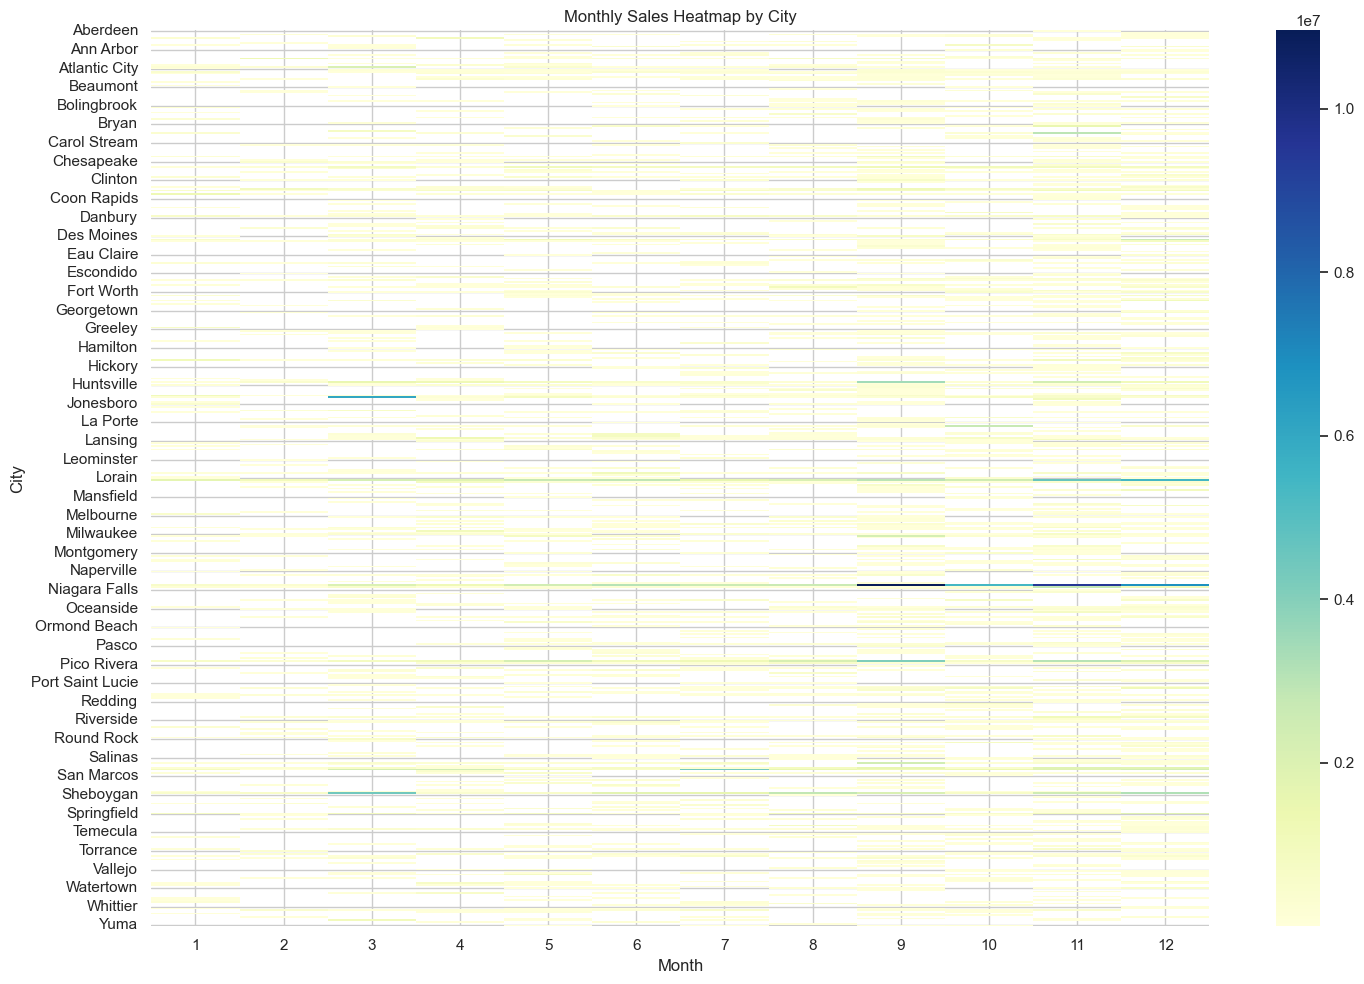

In [222]:
heatmap_data = df.groupby(['City', 'Order_Month'])['Sales'].sum().unstack()
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Monthly Sales Heatmap by City')
plt.xlabel('Month')
plt.ylabel('City')
plt.tight_layout()
plt.show()


## 24. Sales Boxplot

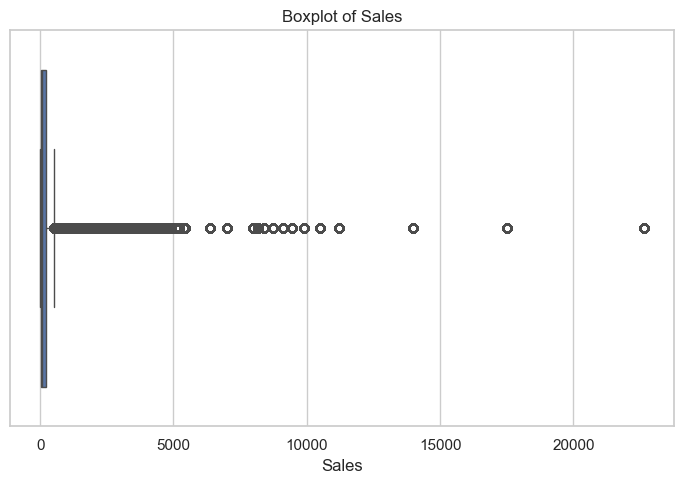

In [224]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales')
plt.tight_layout()
plt.show()


## 25.  Box plot of CPI and Gasoline Price 

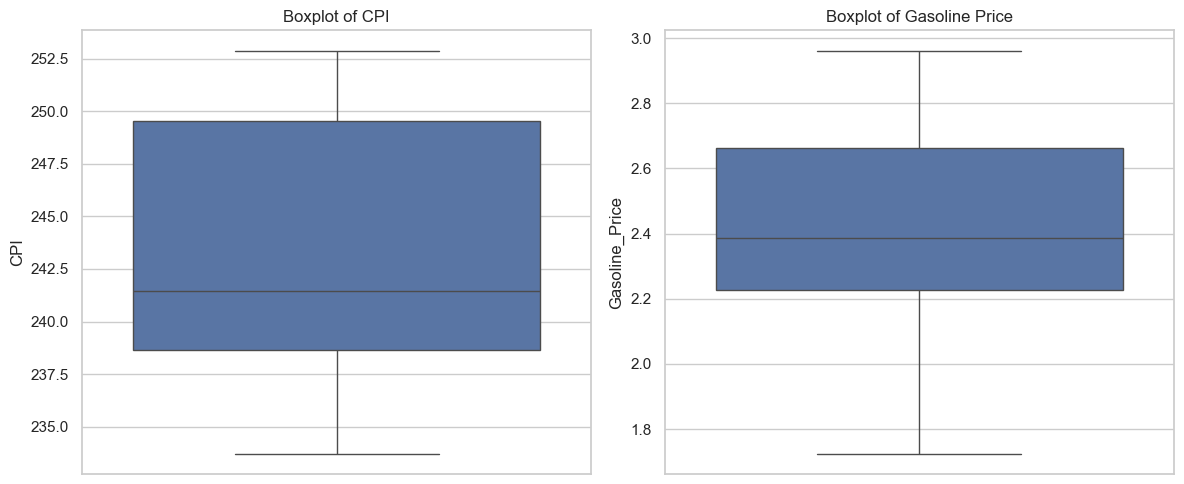

In [227]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df['CPI'], ax=ax[0])
ax[0].set_title('Boxplot of CPI')

sns.boxplot(y=df['Gasoline_Price'], ax=ax[1])
ax[1].set_title('Boxplot of Gasoline Price')

plt.tight_layout()
plt.show()


## 26. High Sales Outliers Analysis

In [229]:
threshold = df['Sales'].quantile(0.99)
high_sales_outliers = df[df['Sales'] > threshold]

print(f"Top 1% Sales Threshold: {threshold:.2f}")
print(f"Outlier Records: {high_sales_outliers.shape[0]}")
high_sales_outliers[['Order Date', 'City', 'Product Name', 'Sales']].head()


Top 1% Sales Threshold: 2518.29
Outlier Records: 17865


,Order Date,City,Product Name,Sales
5355,2016-09-17,Philadelphia,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.43
5356,2016-09-17,Philadelphia,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.43
5357,2016-09-17,Philadelphia,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.43
5358,2016-09-17,Philadelphia,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.43
5359,2016-09-17,Philadelphia,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.43


## 27. Sales Share by Segment

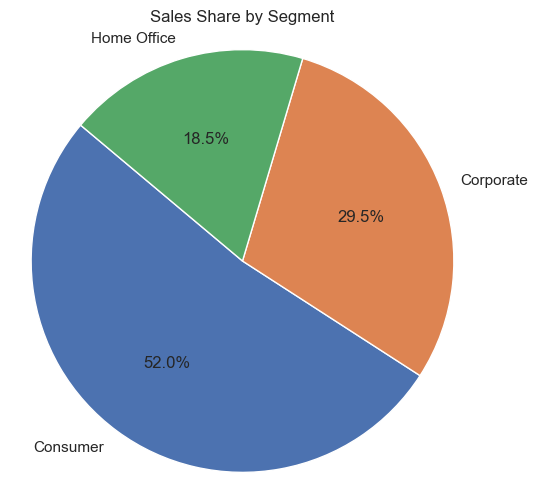

In [231]:
segment_sales = df.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(6, 6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Share by Segment')
plt.axis('equal')
plt.show()


## 28. Top 10 Cities by Sales

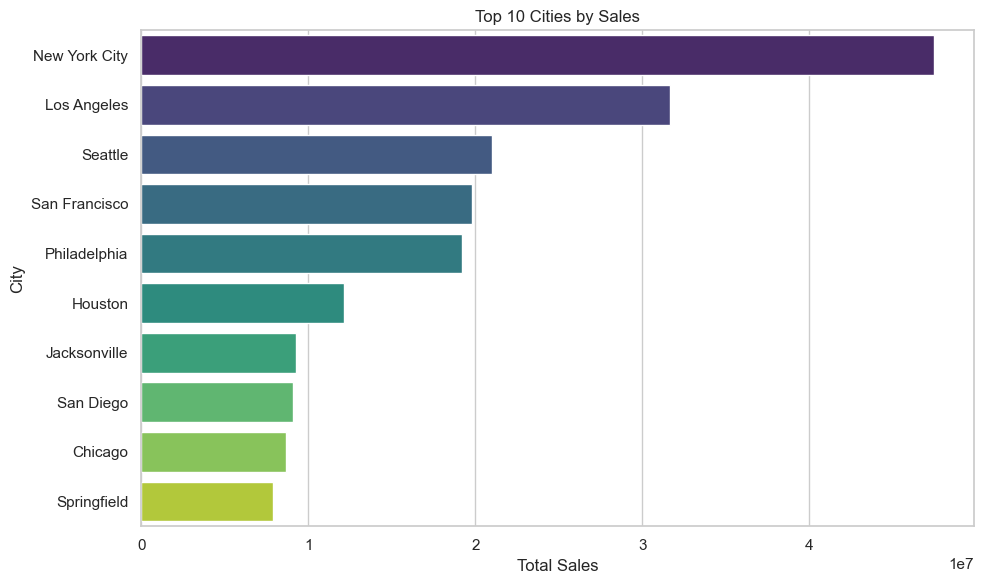

In [233]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis', hue=top_cities.index, legend=False)
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()



## 29. Monthly Sales by Region

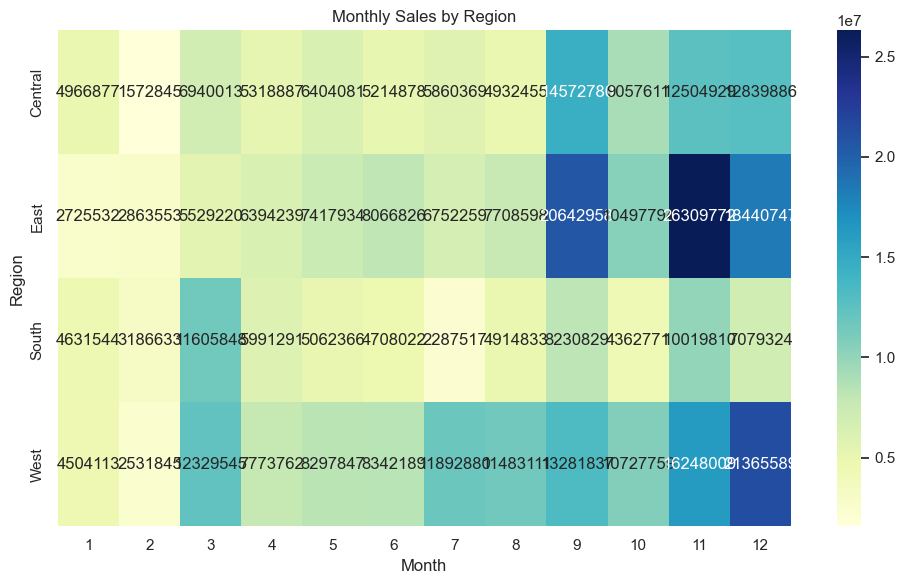

In [235]:
heatmap_data = df.groupby(['Region', 'Order_Month'])['Sales'].sum().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Monthly Sales by Region')
plt.xlabel('Month')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


## . Save DataFrame to CSV

In [251]:
# Save to CSV
df_final.to_csv("retail_data_final.csv", index=False)
print("✅ Dataset successfully saved as 'retail_feature_engineered.csv'")


✅ Dataset successfully saved as 'retail_feature_engineered.csv'
